## Quantum Key Distribution: BB84 Protocol:

### Alice 💁‍♀️ and Bob 🙋‍♂️ want a Secure Channel

Alice and Bob want to exchange private messages, but any communication channel could be tapped by someone like Eve 😈. To protect their messages, Alice can **encrypt** them, transforming the message (e.g., replacing letters with numbers). Bob, knowing the method, can **decrypt** it by reversing the encryption. 

Even if Eve intercepts their messages, they will appear as meaningless numbers to her.

### Symmetric Key Cryptography 🔑

In a simple case, Alice and Bob can share a **symmetric key**, which includes the instructions to encrypt and decrypt messages. Without this key, Eve cannot decipher their communication, keeping their messages safe.

As long as Alice and Bob share this secret key, their messages remain secure, even if Eve intercepts them.


### What is BB84?

The **BB84 protocol** is a **Quantum Key Distribution (QKD)** method that helps Alice 💁‍♀️ and Bob 🙋‍♂️ securely share a secret key for encrypted communication.

#### The Challenge:
Alice and Bob need a shared key, but securely exchanging it over a potentially tapped channel is difficult—meeting in person every time isn’t practical.

#### How BB84 Helps:
The **BB84 protocol** uses quantum mechanics to:
- Detect if the key has been intercepted by an eavesdropper (Eve 😈).
- If the key is secure, use it for encryption.
- If intercepted, discard it and try again until they get a secure key.

#### Requirements:
- **Quantum computers** for both Alice and Bob.
- A **quantum communication channel** (e.g., fiber-optic cable for polarized photons).
- A **classical communication channel** (like a phone line), which might be less secure.

With BB84, Alice and Bob can establish a secure communication channel, ensuring their key remains private and their messages encrypted.


### Overview of the BB84 Protocol

Here’s a quick summary of how the **BB84 protocol** works:

1. **Alice's Preparation**:
   - Alice creates a random bit string.
   - For each bit, she randomly selects a basis (encoding method) and encodes the bits into qubits using these bases.

2. **Sending Qubits**:
   - Alice sends the encoded qubits to Bob via a quantum communication channel.

3. **Bob's Measurement**:
   - Bob randomly chooses a basis for each qubit and measures them accordingly.

4. **Basis Communication**:
   - Alice uses a classical communication channel to inform Bob of her chosen bases and the first few bits she sent.

5. **Detection of Interception**:
   - Bob checks the first few bits to see if the qubits were intercepted by Eve 😈.

6. **Key Formation**:
   - If no interception is detected, Alice and Bob use the bits where they chose the same bases to form their secret key.
   - If interception is detected, they discard the key and repeat the process.

We’ll next dive into the details of how the protocol functions when there is no interception by Eve.


In [3]:
import qiskit
import qiskit.visualization
import random
import qiskit_aer

### Encoding

The first step in the BB84 protocol is for Alice to encode her bit string into qubits using different bases.

**What are Bases?**

- A **qubit** can be visualized as a vector on the **Bloch Sphere**.
- Each axis of the Bloch Sphere represents a possible basis for encoding.
- For example:
  - A vector pointing upward represents the state $|0\rangle$.
  - A vector pointing downward represents the state $|1\rangle$.
- The vertical axis is known as the **Z-axis**.

In the **Z-basis**, Alice encodes:
- A bit `0` as $|0\rangle$ (shown in the left image).
- A bit `1` as $|1\rangle$ (shown in the right image).

The choice of basis affects how the qubits are interpreted by Bob.


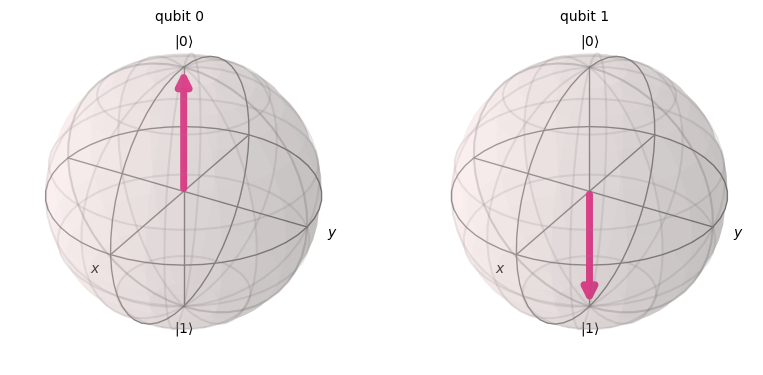

In [11]:
# let us generate image for the above topic:
import qiskit.quantum_info
import qiskit.visualization


qc = qiskit.QuantumCircuit(2)
qc.x(1)
backend = qiskit_aer.Aer.get_backend("statevector_simulator")
result_ = qiskit.transpile(qc, backend)
statevector = qiskit.quantum_info.Statevector(result_)
qiskit.visualization.plot_bloch_multivector(statevector)

We can also choose other basis like X - basis. In the figures below the image on left represents value 0 and image on right represents value 1

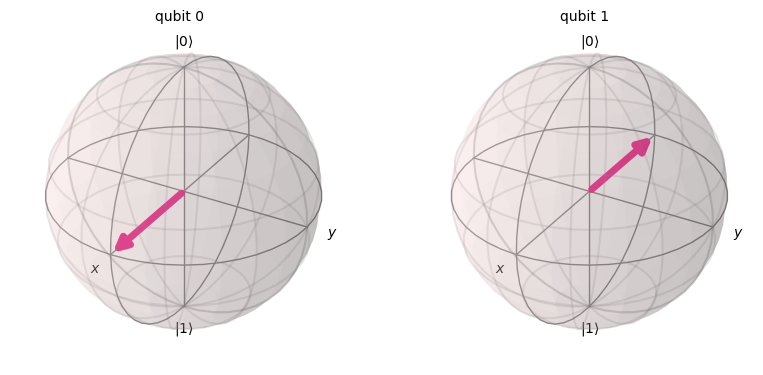

In [13]:
qc = qiskit.QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
backend = qiskit_aer.Aer.get_backend("statevector_simulator")
result_ = qiskit.transpile(qc, backend)
statevector = qiskit.quantum_info.Statevector(result_)
qiskit.visualization.plot_bloch_multivector(statevector)

### Encoding in the BB84 Protocol

So now we have 2 different ways in which we can encode 0 and encode 1

**In the Z-basis:**

- `0` as $|0\rangle$
- `1` as $|1\rangle$

**In the X-basis:**

- `0` as $\frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)$
- `1` as $\frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$


The first step is for Alice to randomly create a string of, say, 500 bits. She can do this by flipping a coin and writing down 0 everytime she lands on heads and 1 everytime she lands on tails.

In [18]:
KEY_LENGTH = 500
random.seed(0)
alice_bits = ""
for i in range(KEY_LENGTH):
    randBit = random.randint(0,1)
    alice_bits += str(randBit)
print("The bits alice will send are " + alice_bits[:15] + "...")

The bits alice will send are 110111111001001...


Then, Alice randomly selects a basis for each bit, choosing between the Z-basis or the X-basis. She makes this decision by flipping a coin: if it lands on heads, she uses the Z-basis; if it lands on tails, she uses the X-basis.


In [21]:
def generate_bases(num_of_bases):
    bases_string=""
    for i in range(num_of_bases):
        randBasis = random.randint(0,1)

        if randBasis == 1:
            bases_string += "Z"
        else:
            bases_string += "X"
    return bases_string

In [22]:
alice_bases = generate_bases(KEY_LENGTH)
print("the bases alice is going to encode in are: " + alice_bases[:15] + "...")

the bases alice is going to encode in are: XZZXXXXZXZZZXXX...


Now, Alice encodes each bit into its corresponding basis on her quantum computer, creating a string of 500 qubits. She sends these qubits over an optical cable to Bob. Here’s how to do this using Qiskit:



In [24]:
def encode(bits, bases):
    encoded_qubits = []

    for bit, basis in zip(bits, bases):
        qc = qiskit.QuantumCircuit(1,1)

        if bit == '0' and basis == 'Z':
            encoded_qubits.append(qc)
        if bit == '1' and basis == 'Z':
            qc.x(0)
            encoded_qubits.append(qc)
        if bit == '0' and basis == 'X':
            qc.h(0)
            encoded_qubits.append(qc)
        if bit == '1' and basis == 'X':
            qc.x(0)
            qc.h(0)
            encoded_qubits.append(qc)
    return (encoded_qubits)
        

In [25]:
encoded_qubits = encode(alice_bits, alice_bases)

for i in range(5):
    print(encoded_qubits[i])
print("....")

     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               
     ┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════
          
     
  q: 
     
c: 1/
     
     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               
     ┌───┐┌───┐
  q: ┤ X ├┤ H ├
     └───┘└───┘
c: 1/══════════
               
....
